In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneOut
%matplotlib notebook
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from IPython.display import clear_output
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow import feature_column

In [2]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


In [3]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
data_clean = pd.read_csv('Date_clean.csv')

In [6]:
data_clean.head()

,hospital_id,hospital_death,age,elective_surgery,hospital_admit_source,icu_admit_source,icu_id,icu_type,apache_2_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_unable_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem
0,22,0,68.0,0,5,2,286,3,113.0,0,0.0,31.0,2.51,0.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,46.0,32.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,86.0,85.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10
1,185,0,77.0,0,5,2,274,6,108.0,0,0.0,9.0,0.56,0.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,85.0,57.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
2,187,0,67.0,0,3,1,293,6,301.0,0,0.0,13.0,0.71,0.0,156.0,113.0,44.2,0.0,130.0,35.0,137.0,36.6,0.0,10.9,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8
3,187,0,59.0,0,9,1,293,6,108.0,0,0.0,18.0,0.78,0.0,197.0,133.0,33.5,1.0,138.0,53.0,135.0,35.0,1.0,5.9,107.0,65.0,76.0,68.0,112.0,70.0,138.0,84.0,117.0,97.0,38.0,16.0,100.0,87.0,191.0,116.0,151.0,133.0,37.2,35.0,107.0,79.0,107.0,79.0,79.0,72.0,138.0,117.0,117.0,117.0,18.0,18.0,100.0,100.0,191.0,163.0,191.0,163.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
4,132,0,70.0,0,4,1,282,6,113.0,0,0.0,48.0,2.05,0.0,164.0,120.0,22.6,0.0,60.0,28.0,140.0,36.6,1.0,12.8,84.0,46.0,84.0,46.0,118.0,86.0,114.0,60.0,114.0,60.0,28.0,12.0,100.0,92.0,147.0,71.0,147.0,71.0,38.5,36.6,74.0,55.0,74.0,55.0,118.0,114.0,88.0,88.0,60.0,60.0,28.0,26.0,96.0,92.0,119.0,106.0,119.0,106.0,0.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10


# BLR model

In [7]:
X_BLR = data_clean.drop('hospital_death', axis=1)
y_BLR = data_clean['hospital_death']

In [8]:
import imblearn
from collections import Counter
from imblearn.combine import SMOTEENN 
SMOTEENN = SMOTEENN()

print('Original dataset shape %s' % Counter(y_BLR))

X_res, y_res = SMOTEENN.fit_resample(X_BLR, y_BLR)

print('After undersample dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 44425, 1: 4452})
After undersample dataset shape Counter({1: 44367, 0: 28496})


In [9]:
# Split the data into training and testing sets
X_train_BLR, X_test_BLR, y_train_BLR, y_test_BLR = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_BLR = scaler.fit_transform(X_train_BLR)
X_test_BLR = scaler.transform(X_test_BLR)

In [11]:
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegressionCV

# Create and train the logistic regression model with elastic net regularization
logreg = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.5])
#SAGA (Stochastic Average Gradient Descent) extends Gradient Descent algorithm for large-scale machine learning problems.
logreg.fit(X_train_BLR, y_train_BLR)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

LogisticRegressionCV(l1_ratios=[0.5], penalty='elasticnet', solver='saga')

In [12]:
# Make predictions on the test set
y_pred_BLR = logreg.predict(X_test_BLR)

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test_BLR, y_pred_BLR)
print('Accuracy:', accuracy)


Accuracy: 0.8480259847202525


<IPython.core.display.Javascript object>


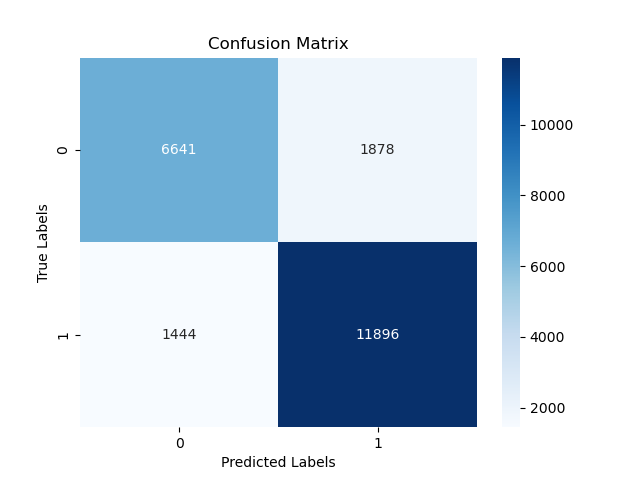

In [14]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test_BLR, y_pred_BLR)
# Plot the confusion matrix using seaborn
plt.figure()
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
observed_deaths = confusion_mat[1, 1]  # True positives
expected_deaths = y_test_BLR.sum()  # Sum of true positives and false negatives
smr = observed_deaths / expected_deaths
print('Standardized Mortality Ratio (SMR):', smr)

Standardized Mortality Ratio (SMR): 0.8917541229385307


In [16]:
# Predict probabilities for the test set
y_pred_prob_BLR = logreg.predict(X_test_BLR)
    
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_BLR, y_pred_prob_BLR)
    
# Compute the AUROC score
roc_auc = roc_auc_score(y_test_BLR, y_pred_prob_BLR)
    

<IPython.core.display.Javascript object>


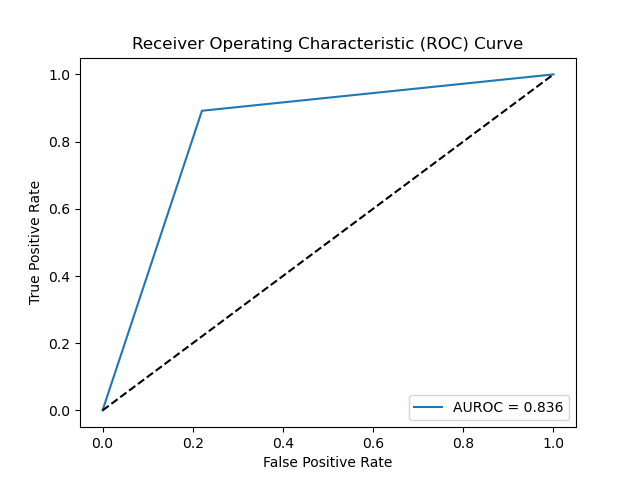

In [17]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUROC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
# Determine the confidence of predictions
#confidence = (y_pred_prob_BLR - thresholds[0]) / (thresholds[-1] - thresholds[0])
# Print the confidence of predictions
#print('Confidence of Predictions:', confidence)

# DEPLOY

In [56]:
data_test_clean = pd.read_csv('Date_test_clean.csv')

In [57]:
# Load the "data_test_clean" dataset
X_test_clean = data_test_clean  # Assuming "data_test_clean" doesn't have the 'hospital_death' column

# Standardize the preprocessed "data_test_clean" dataset using the same scaler used for training data
X_test_clean_scaled = scaler.fit_transform(X_test_clean)




In [58]:
# Make predictions on the standardized "data_test_clean" dataset
y_pred_clean = logreg.predict(X_test_clean_scaled)

# Select the indices of the patients you want to include
selected_patient_indices = [0, 10, 150, 230, 500]  # Example indices

# Make predictions on the standardized "data_test_clean" dataset
y_pred_prob_BLR = logreg.predict_proba(X_test_clean_scaled)[:, 1]

# Iterate over the selected patient indices and print the individual prediction and confidence for each patient
for patient_index in selected_patient_indices:
    individual_prediction = int(round(y_pred_prob_BLR[patient_index]))
    individual_confidence = np.abs(y_pred_prob_BLR[patient_index] - 0.5)  # Assuming the prediction is between 0 and 1

    print(f"Patient Index: {patient_index} - Prediction: {individual_prediction} - Confidence: {individual_confidence}")

Patient Index: 0 - Prediction: 0 - Confidence: 0.07715721424609112
Patient Index: 10 - Prediction: 1 - Confidence: 0.49172573919110774
Patient Index: 150 - Prediction: 1 - Confidence: 0.11274535453616885
Patient Index: 230 - Prediction: 0 - Confidence: 0.35961991513785124
Patient Index: 500 - Prediction: 1 - Confidence: 0.1837963466754048


# Electro BLR

In [20]:
electro_data_clean = pd.read_csv('electro_data_clean.csv')

In [21]:
electro_X_BLR = electro_data_clean.drop('hospital_death', axis=1)
electro_y_BLR = electro_data_clean['hospital_death']

In [22]:
#SMOTEENN = SMOTEENN()

print('Original dataset shape %s' % Counter(electro_y_BLR))

electro_X_res, electro_y_res = SMOTEENN.fit_resample(electro_X_BLR, electro_y_BLR)

print('After undersample dataset shape %s' % Counter(electro_y_res))

Original dataset shape Counter({0: 44425, 1: 4452})
After undersample dataset shape Counter({1: 44327, 0: 28386})


In [23]:
# Split the data into training and testing sets
electro_X_train_BLR, electro_X_test_BLR, electro_y_train_BLR, electro_y_test_BLR = train_test_split(electro_X_res, electro_y_res, test_size=0.3, random_state=42)


In [24]:
electro_X_train_BLR = scaler.fit_transform(electro_X_train_BLR)
electro_X_test_BLR = scaler.transform(electro_X_test_BLR)

In [25]:
electro_logreg = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.3])
electro_logreg.fit(electro_X_train_BLR, electro_y_train_BLR)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

LogisticRegressionCV(l1_ratios=[0.3], penalty='elasticnet', solver='saga')

In [26]:
# Make predictions on the test set
electro_y_pred_BLR = electro_logreg.predict(electro_X_test_BLR)

In [27]:
# Calculate accuracy
electro_accuracy = accuracy_score(electro_y_test_BLR, electro_y_pred_BLR)
print('Accuracy:', electro_accuracy)

Accuracy: 0.8382231594388925


<IPython.core.display.Javascript object>


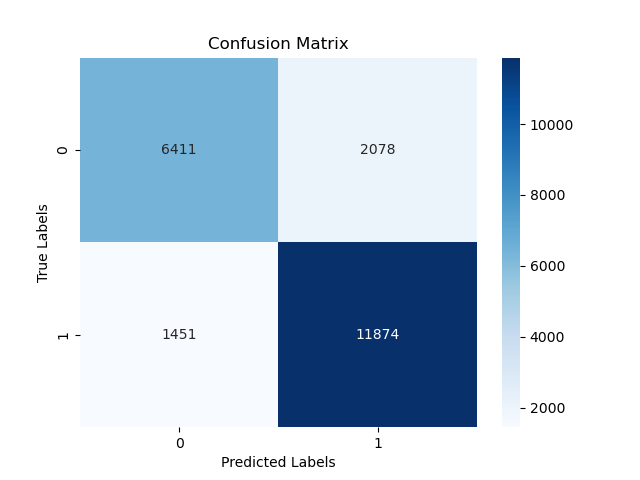

In [28]:
# Create a confusion matrix
electro_confusion_mat = confusion_matrix(electro_y_test_BLR, electro_y_pred_BLR)
# Plot the confusion matrix using seaborn
plt.figure()
sns.heatmap(electro_confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
electro_observed_deaths = electro_confusion_mat[1, 1]  # True positives
electro_expected_deaths = electro_y_test_BLR.sum()  # Sum of true positives and false negatives
electro_smr = electro_observed_deaths / electro_expected_deaths
print('Standardized Mortality Ratio (SMR):', electro_smr)

Standardized Mortality Ratio (SMR): 0.8911069418386491


In [30]:
# Predict probabilities for the test set
electro_y_pred_prob_BLR = electro_logreg.predict(electro_X_test_BLR)
    
# Compute the false positive rate, true positive rate, and thresholds
electro_fpr, electro_tpr, electro_thresholds = roc_curve(electro_y_test_BLR, electro_y_pred_prob_BLR)
    
# Compute the AUROC score
electro_roc_auc = roc_auc_score(electro_y_test_BLR, electro_y_pred_prob_BLR)

<IPython.core.display.Javascript object>


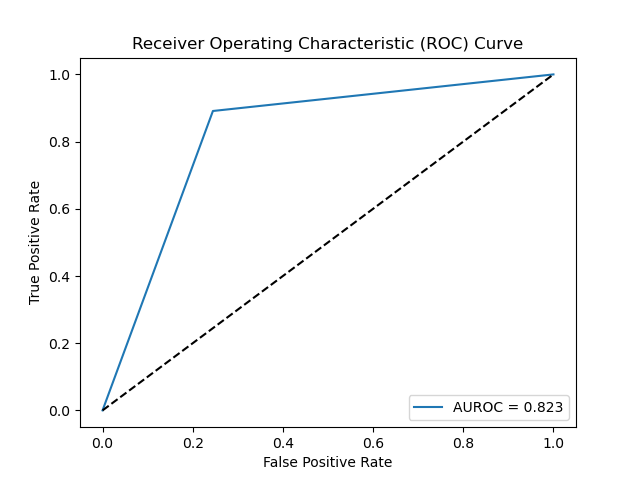

In [31]:
# Plot the ROC curve
plt.figure()
plt.plot(electro_fpr, electro_tpr, label='AUROC = %0.3f' % electro_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<IPython.core.display.Javascript object>


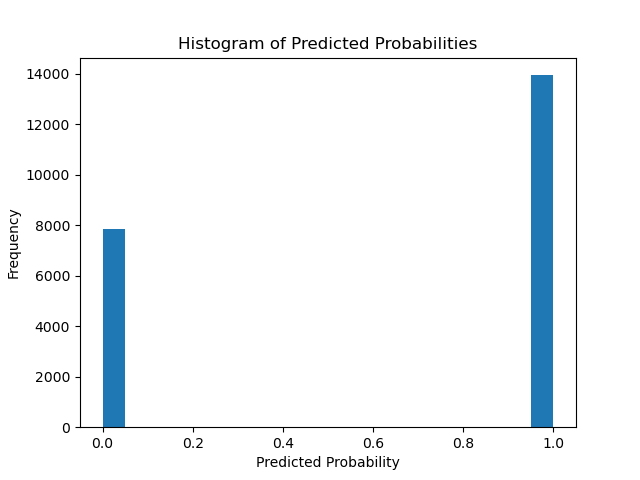

In [32]:
# Plot a histogram of the predicted probabilities
plt.figure()
plt.hist(electro_y_pred_prob_BLR, bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

# DEPLOY

In [59]:
electro_data_test_clean = pd.read_csv('electro_Date_test_clean.csv')

In [60]:
#electro_data_test_clean.shape

In [61]:
# Load the "data_test_clean" dataset
electro_X_test_clean = electro_data_test_clean  # Assuming "data_test_clean" doesn't have the 'hospital_death' column

# Standardize the preprocessed "data_test_clean" dataset using the same scaler used for training data
electro_X_test_clean_scaled = scaler.fit_transform(electro_X_test_clean)



In [62]:
# Make predictions on the standardized "data_test_clean" dataset
electro_y_pred_clean = electro_logreg.predict(electro_X_test_clean_scaled)

# Select the indices of the patients you want to include
electro_selected_patient_indices = [0, 10, 150, 230, 500]  # Example indices

# Make predictions on the standardized "data_test_clean" dataset
electro_y_pred_prob_BLR = electro_logreg.predict_proba(electro_X_test_clean_scaled)[:, 1]

# Iterate over the selected patient indices and print the individual prediction and confidence for each patient
for patient_index in electro_selected_patient_indices:
    electro_individual_prediction = int(round(electro_y_pred_prob_BLR[patient_index]))
    electro_individual_confidence = np.abs(electro_y_pred_prob_BLR[patient_index] - 0.5)  # Assuming the prediction is between 0 and 1

    print(f"Patient Index: {patient_index} - Prediction: {electro_individual_prediction} - Confidence: {electro_individual_confidence}")

Patient Index: 0 - Prediction: 0 - Confidence: 0.02354221325211059
Patient Index: 10 - Prediction: 1 - Confidence: 0.47561422630959005
Patient Index: 150 - Prediction: 1 - Confidence: 0.22601585148396475
Patient Index: 230 - Prediction: 0 - Confidence: 0.35709396164952534
Patient Index: 500 - Prediction: 1 - Confidence: 0.21539450207505062
